---

# An Analysis of the 2019 Stack Overflow Survey Data

---

# Methodology

---
This analysis is going to follow the CRISP-DM methodology, cross-industry process for data mining. CRISP-DM is a robust and well known methodology that provides a structured approach to planning a data mining project. It includes the following processes:

1. business understanding
2. data understanding
3. prepare data
4. data modelling
5. evaluate the results
6. deploy
    
---

# 1.0 Business Understanding

With nearly 90 000 responses fielded from over 170 countries and dependent territories, <b>Stack Overflow Annual Developer</b> Survey continues to be the most comprehensive survey of software developers ever conducted. The survey covers aspects such as career satisfaction and job search to programming languages.

In this project, the survey results will be used to answer the following questions for aspiring data scientists:

*   What is the programming language of choice?
*   What's the pay for developers like?
*   What is the framework of choice for developers?

A summary of the finding is available at this blogpost: [Results Analysis](https://medium.com/p/c8dac1617d40)

---

### Summary of Results

After analyzing the data, we found that python is the programming language of choice for developers who identify as Data Scintists and Machine Learning Specialists. Salaries for Data Scientists and Machine Learning Specialist are the highest in the USA. Surprisingly, jQuery is the web framework of choice.

For more details, please refer to the the full analysis below.

---

In [134]:
# Load required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

---

# 2.0 Data Understanding

---


In [135]:
df = pd.read_csv("../data/stack_overflow_survey/survey_results_public_2019.csv", low_memory = False)
schema = pd.read_csv("../data/stack_overflow_survey/survey_results_schema.csv")
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [136]:
df.shape

(88883, 85)

In [137]:
schema.head()

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,OpenSourcer,How often do you contribute to open source?
4,OpenSource,How do you feel about the quality of open sour...


In [138]:
schema.shape

(85, 2)

The survey data consists of 88,883 records and 85 fetures.

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88883 entries, 0 to 88882
Data columns (total 85 columns):
Respondent                88883 non-null int64
MainBranch                88331 non-null object
Hobbyist                  88883 non-null object
OpenSourcer               88883 non-null object
OpenSource                86842 non-null object
Employment                87181 non-null object
Country                   88751 non-null object
Student                   87014 non-null object
EdLevel                   86390 non-null object
UndergradMajor            75614 non-null object
EduOther                  84260 non-null object
OrgSize                   71791 non-null object
DevType                   81335 non-null object
YearsCode                 87938 non-null object
Age1stCode                87634 non-null object
YearsCodePro              74331 non-null object
CareerSat                 72847 non-null object
JobSat                    70988 non-null object
MgrIdiot                  61

In [140]:
# check columns with no missing values
set(df.isna().sum()[df.isna().sum()==0].keys())

{'Hobbyist', 'OpenSourcer', 'Respondent'}

In [141]:
# check which columns have over 50% missing values
set(df.columns[100*df.isna().sum()/df.shape[0] > 50])

set()

In [142]:
# check is we have missing schemas
schema.isnull().sum()

Column          0
QuestionText    0
dtype: int64

## What is the programming of choice?

There are just so, so many programming languages. And when you don't know much, which is very usual at the start, this can be very overwhelming. So let's take a look at what different developers from around the world use. That should give us an idea of what laguagues are important for what fields. 

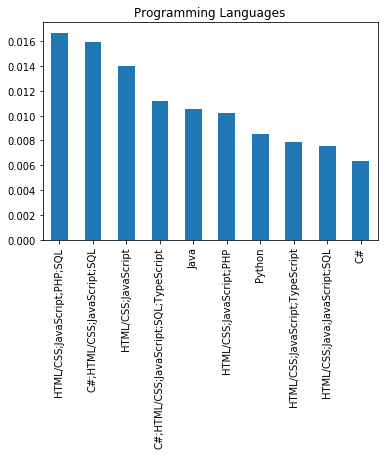

In [143]:
count_values = df.LanguageWorkedWith.value_counts()#Provide a pandas series of the counts for each LanguageWorkedWith

# display the top 10

(count_values[:10]/df.shape[0]).plot(kind="bar");
plt.title("Programming Languages");

In [144]:
# the format of programming languages needs to be cleaned up, this is because for developers using multiple languages, 
# those languages are concatenated with ;

In [145]:
# We have to split the LanguageWorkedWith to get a proper picture
languages = df[df['LanguageWorkedWith'].notnull()]

unique_languages = {}

# split the languages on ;
for language_set in languages['LanguageWorkedWith'].apply(lambda row: str(row).split(';')):
    for language in language_set:
        if language not in unique_languages.keys():
            unique_languages[language] = 1
        else:
            unique_languages[language] += 1

In [146]:
# develop a function that will be used for plotting bar graphs (horizontal)
def plot_dimension_count(unique_dim_dict, plot_title):
    """ Function for plotting a horizontal bar graph for the given dimension dictionary
    
    INPUT - unique_dim_dict - dictionary 
            plot_title - string - plot_title
    
    OUTPUT - bar chart showing the total count for per dimension of interest
            
    """
    dim_count = pd.DataFrame.from_dict(unique_dim_dict, orient='index', dtype=None)
    dim_count.columns = ['Count']
    dim_count.sort_values('Count',ascending=True,inplace=True)

    dim_count.plot(kind = 'barh', figsize = (12,12), fontsize = 10, title = plot_title);

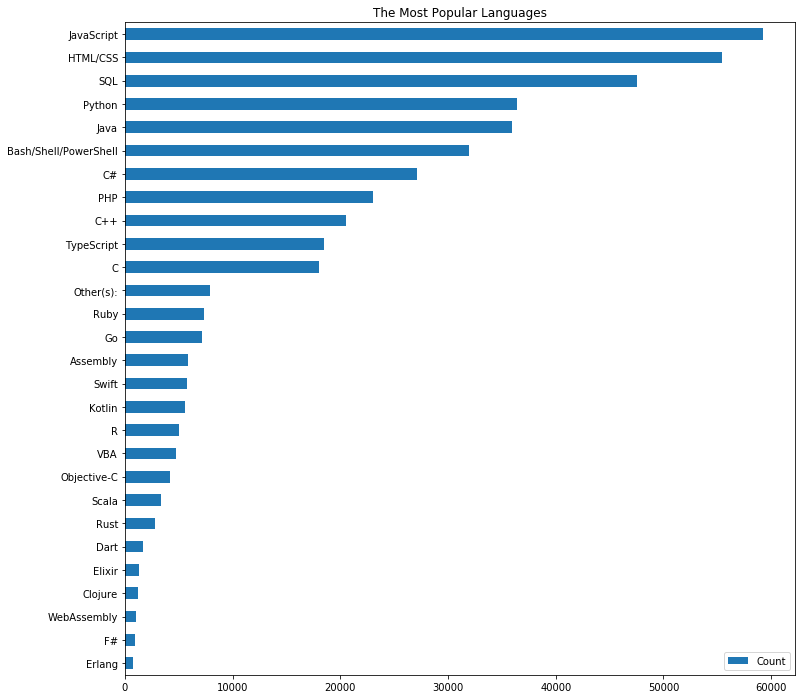

In [147]:
# let make a bar graph
plot_dimension_count(unique_languages,'The Most Popular Languages')

---

Although it's satisfying to knwo the most popular languages, this alone does not help in knowing the most popular language for data science. So, we are going to take a slightly different root.

---

In [148]:
# We have to split the LanguageWorkedWith to get a proper picture

# Lets get unique developers
developers = df[df['DevType'].notnull()] # drop null values

unique_developers = {}

# split the languages on ;
for developer_set in developers['DevType'].apply(lambda row: str(row).split(';')):
    for developer in developer_set:
        if developer not in unique_developers.keys():
            unique_developers[developer] = 1
        else:
            unique_developers[developer] += 1

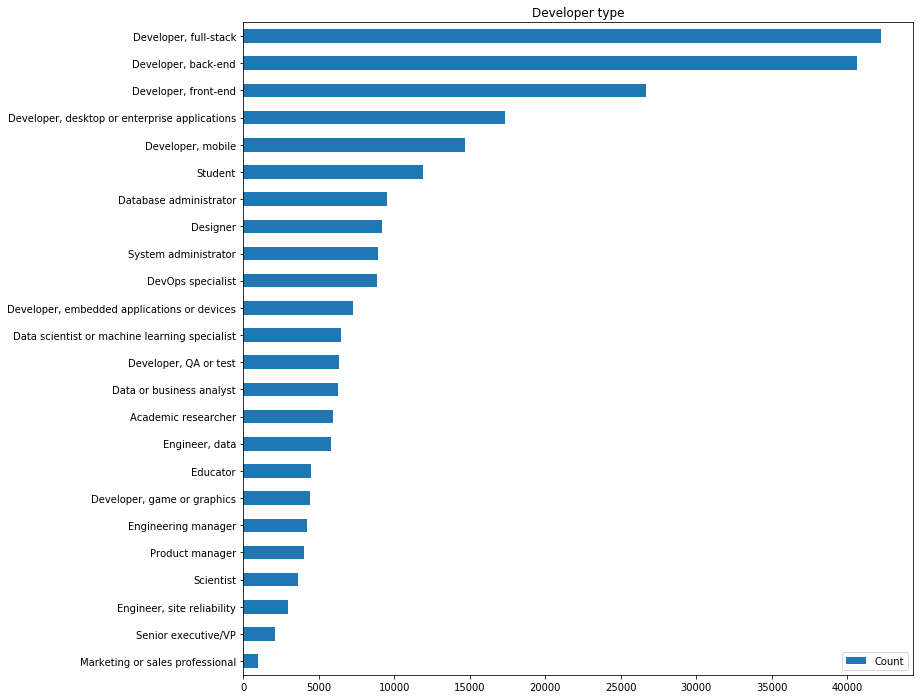

In [149]:
# lets make a bar graph
plot_dimension_count(unique_developers,'Developer type')

Since we are interested in Data Science language of choice, we will focus on 'Data scientist or machine learning specialist'

In [150]:
# now for each 'Data scientist or machine learning specialist' developer, lets get programming language counts
languages = languages[languages['DevType'].notnull()]

# lets create an empty developer dict
developer_dict = {}
for devtype in developer_count.index.tolist():
    developer_dict['{}'.format(devtype)] = {}

# populate the dictionary with languages
for dev in developer_dict.keys():
    developer_dict[dev] = {key: 0 for key in list(unique_languages.keys())}
    
# now lets count the number of developers using the language
for key, val in enumerate(languages['DevType']):
    all_developers = val.split(';')
    all_languages = languages.iloc[key, 43].split(';')
    for dev in all_developers:
        for lang in all_languages:
            developer_dict[dev][lang] += 1

developer_language_count = pd.DataFrame.from_dict(developer_dict, orient='index', dtype=None).T


In [151]:
developer_language_count.head()

,Academic researcher,Data or business analyst,Data scientist or machine learning specialist,Database administrator,Designer,DevOps specialist,"Developer, QA or test","Developer, back-end","Developer, desktop or enterprise applications","Developer, embedded applications or devices",...,Educator,"Engineer, data","Engineer, site reliability",Engineering manager,Marketing or sales professional,Product manager,Scientist,Senior executive/VP,Student,System administrator
HTML/CSS,3313,3909,3258,7253,7243,5907,4471,26605,11178,4186,...,3151,3286,1853,2732,749,2900,1846,1513,8122,6480
Java,2506,2138,2453,3657,3621,3651,2876,17904,7739,3207,...,1988,2484,1198,1673,322,1429,1262,766,6482,3484
JavaScript,3217,3860,3319,7436,7192,6529,4666,29372,11748,4413,...,3151,3499,2049,3040,700,3024,1764,1600,7574,6558
Python,3621,3264,5125,3945,3238,4647,2676,16537,6274,3693,...,2112,3742,1748,1969,373,1598,2513,977,6481,4586
C++,2364,1218,2066,2130,2439,1670,1594,9059,5600,3702,...,1283,1611,639,967,190,894,1496,495,4720,2220


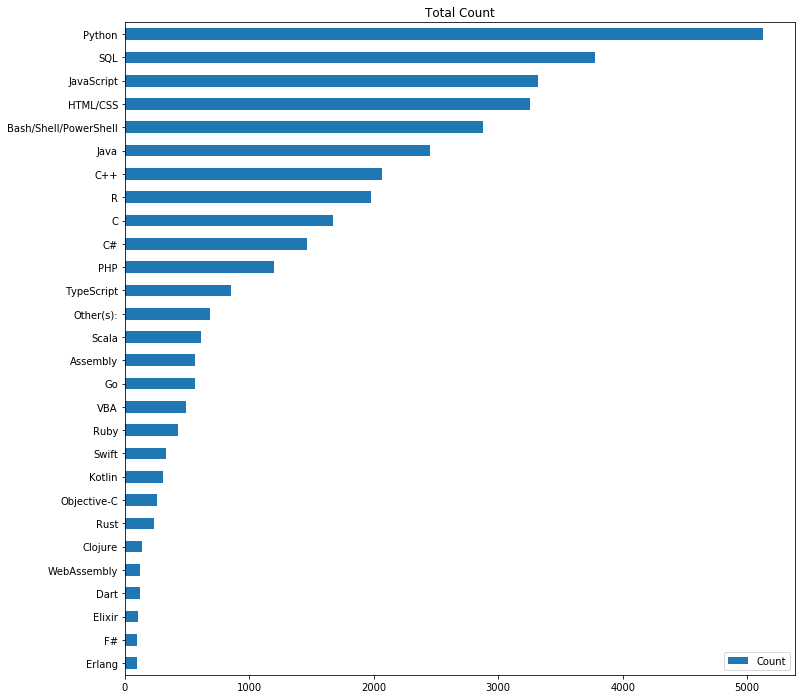

In [174]:
# good, now we have a dataframe of language by developer

# lets now get a distribution to answer our question
ds_count = pd.DataFrame(developer_language_count['Data scientist or machine learning specialist'])
ds_count.columns = ['Count']
ds_count.sort_values('Count',ascending=True,inplace=True)

ds_count.plot(kind = 'barh', figsize = (12,12), fontsize = 10, title = 'Total Count');

---
__Insight__

Python is by far the language of choice for developers who identify as Data scientist or ML specialist. For those desiring to enter the data science or machine learning landscape, learning python is definitely a good investment.

---

---

# What's the pay for developers like?

---

In [153]:
salaries_df = df[['DevType', 'Country','ConvertedComp']]

for column in salaries_df.columns.tolist():
    col_desc = schema[schema['Column']==column]['QuestionText'].iloc[0]
    print(col_desc)

Which of the following describe you? Please select all that apply.
In which country do you currently reside?
Salary converted to annual USD salaries using the exchange rate on 2019-02-01, assuming 12 working months and 50 working weeks.


In [154]:
# Lets check for missing values in salaries_df
salaries_df.isnull().sum()

DevType           7548
Country            132
ConvertedComp    33060
dtype: int64

In [155]:
# salaries_df missing values in %
round((salaries_df.isnull().sum()/salaries_df.shape[0])*100,1)

DevType           8.5
Country           0.1
ConvertedComp    37.2
dtype: float64

---
__Insight__

it seems that a large number of developers do not reveal their salaries, and this could be due to privacy concerns.

---

To assess the pay for developers, we will make use of salaries distribution by country. This allows us to compare like with like.

In [156]:
# drop rows with missing values from salaries df
clean_salaries_df = salaries_df.dropna().reset_index()
clean_salaries_df.head()

,index,DevType,Country,ConvertedComp
0,2,"Designer;Developer, back-end;Developer, front-...",Thailand,8820.0
1,3,"Developer, full-stack",United States,61000.0
2,5,Data or business analyst;Data scientist or mac...,Canada,366420.0
3,8,"Database administrator;Developer, back-end;Dev...",New Zealand,95179.0
4,9,Data or business analyst;Data scientist or mac...,India,13293.0


In [157]:
clean_salaries_df.shape

(55081, 4)

In [158]:
# Lets make a count of developer by country
clean_salaries_df.Country.value_counts().reset_index()

,index,Country
0,United States,14756
1,United Kingdom,3967
2,India,3953
3,Germany,3734
4,Canada,2225
5,France,1619
6,Brazil,1395
7,Poland,1307
8,Australia,1233
9,Spain,1189


Wow, very interesting!

A large number of countries are under-represented, the US has by far the largest of respondents.

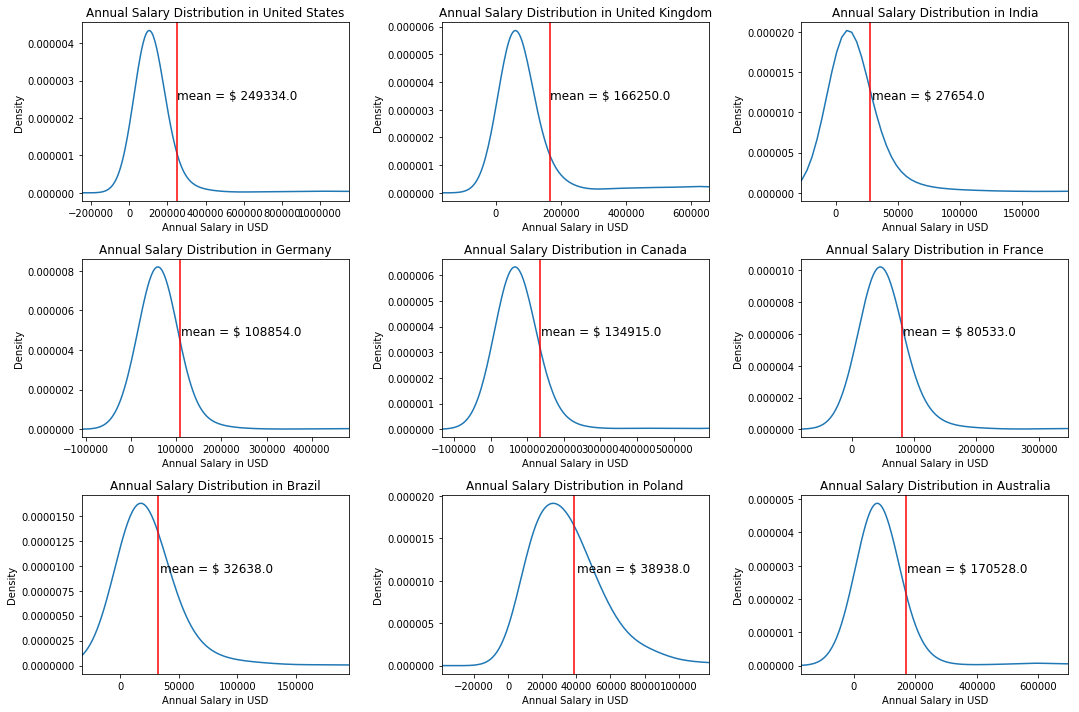

In [159]:
# now lets plot salary distributions for the top 10 countries

fig = plt.figure(figsize=(15,10))

countries = clean_salaries_df['Country'].value_counts().sort_values(ascending=False)[:9].index.tolist()

for i,country in enumerate(countries):
    plt.subplot(3,3,i+1)
    temp_salaries = clean_salaries_df.loc[clean_salaries_df['Country']==country,'ConvertedComp']

    ax = temp_salaries.plot(kind='kde')
    ax.axvline(temp_salaries.mean(), linestyle = '-', color = 'red')
    ax.text((temp_salaries.mean() + 1500), (float(ax.get_ylim()[1])*0.55), 'mean = $ ' + str(round(temp_salaries.mean(),0)), fontsize = 12)
    ax.set_xlabel('Annual Salary in USD')
    ax.set_xlim(-temp_salaries.mean(),temp_salaries.mean()+2*temp_salaries.std())
    
    ax.set_title('Annual Salary Distribution in {}'.format(country))

plt.tight_layout()
plt.savefig('developer_salaries_by_country.png',bbox_inches = 'tight')
plt.show()

---

The US has by far the highest salaries.

While the analysis is useful, we would like to know the distributions for data science related developers.

---

In [160]:
# get the developer type salaries
developer_salary_df = df[['DevType','Country','ConvertedComp']]
# drop all rows with NaNs
clean_developer_salary_df = developer_salary_df.dropna()

In [161]:
# get a list of countries
developer_countries = list(clean_salaries_df['Country'].value_counts().index)

# create a dictionary with country name as key and initialised with 0 for each corresponding country key value
developer_salary_dict = {key: 0 for key in developer_countries}

# now for each country in dict, we want to put developer type and initialise to an empty list
for developer in developer_salary_dict.keys():
    developer_salary_dict[developer] = {key: [] for key in developer_count.index.tolist()}

# lets now populate developer salary dict with salaries per developer type per country
for key, val in enumerate(clean_developer_salary_df['DevType']):
    all_developers = val.split(';')
    country = clean_developer_salary_df.iloc[key, 1]
    salary = clean_developer_salary_df.iloc[key, 2]
    
    for developer in all_developers:
        developer_salary_dict[country][developer].append(salary)

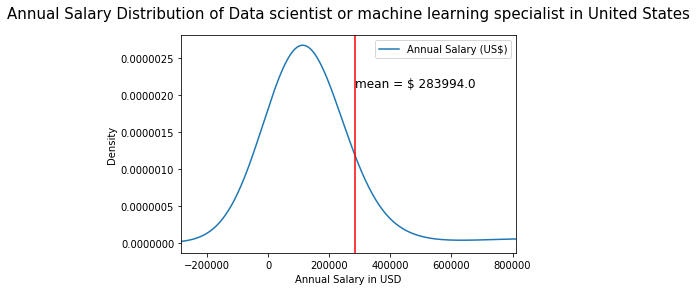

In [162]:
# Now lets visualise the salaries for data science related developers in the USA
dev_type = 'Data scientist or machine learning specialist'

figsize = (15,10)
df1 = pd.DataFrame({'Annual Salary (US$)':developer_salary_dict['United States'][dev_type]})
ax = df1.plot(kind = 'kde')
mean = df1['Annual Salary (US$)'].mean()

ax.axvline(mean, linestyle = '-', color = 'red')
ax.text((mean + 1500), (float(ax.get_ylim()[1])*0.75), 'mean = $ ' + str(round(mean,0)), fontsize = 12)
ax.set_xlabel('Annual Salary in USD')
ax.set_xlim(-mean,mean+2*temp.std())
ax.set_title('Annual Salary Distribution of {} in {}'.format(dev_type, 'United States'), fontsize = 15, y = 1.05)
plt.savefig('salaries_for_data_science_usa',bbox_inches = 'tight')
plt.show()

The mean salaries are much higher than the overall average for USA.

---

# What is the framework of choice for developers?

---

Woohoo! Looks like as it is, I can make it! However, the model is only 82% accurate and my case just could be a false positive. So I'll keep my fingers crossed and keep working hard!

Feel free to use this model if you are considering starting a new career as a developer and fretting over the same things as me when I started.

If you do use this model and get a negative result, here are a few things to keep in mind:
*   This is a very simple model with an accuracy of just 81%.
*   You could be a false negative.
* The defination of 'making it' used here is not perfect.
*   **If you love what you do and work hard, you *will* make it.**



That's it for this project. Thank you for following along my work. If you are looking to start off this journey, I only wish you the best.






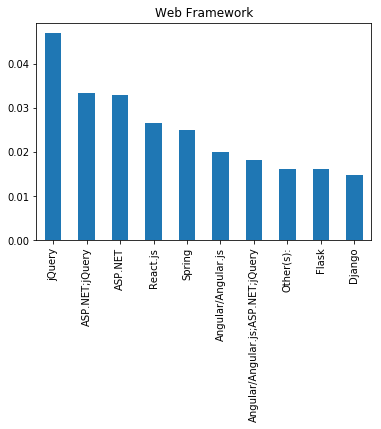

In [163]:
count_values = df.WebFrameWorkedWith.value_counts()#Provide a pandas series of the counts for each LanguageWorkedWith

# display the top 10

(count_values[:10]/df.shape[0]).plot(kind="bar");
plt.title("Web Framework");

In [164]:
# the format of web frameworks needs to be cleaned up, this is because for developers using multiple frameworks, 
# those frameworks are concatenated with ;

In [165]:
# We have to split the WebFrameWorkedWithto get a proper picture
frameworks = df[df['WebFrameWorkedWith'].notnull()]

unique_frameworks = {}

# split the webframework on ;
for framework_set in frameworks['WebFrameWorkedWith'].apply(lambda row: str(row).split(';')):
    for framework in framework_set:
        if framework not in unique_frameworks.keys():
            unique_frameworks[framework] = 1
        else:
            unique_frameworks[framework] += 1
    

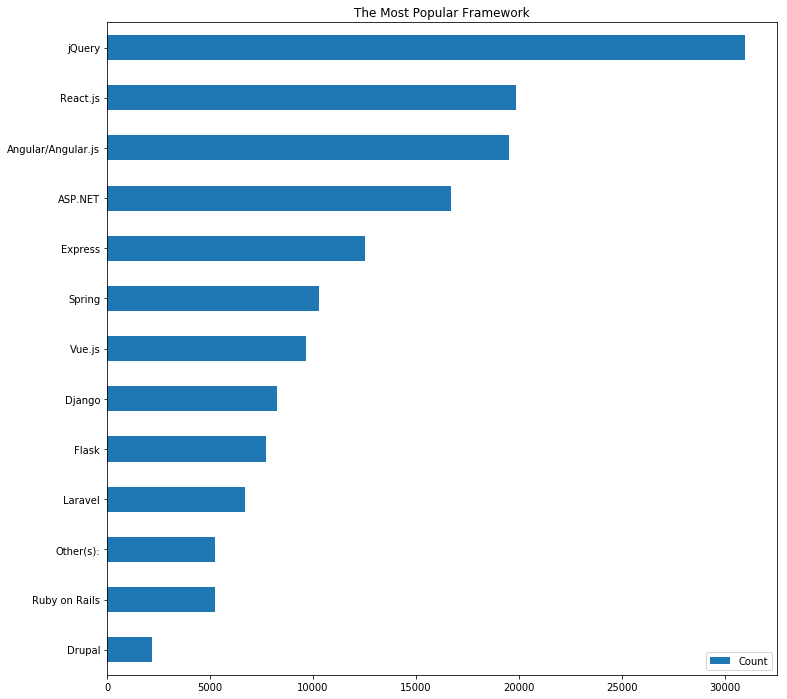

In [166]:
# let make a bar graph
framework_count = pd.DataFrame.from_dict(unique_frameworks, orient='index', dtype=None)
framework_count.columns = ['Count']
framework_count.sort_values('Count',ascending=True,inplace=True)

framework_count.plot(kind = 'barh', figsize = (12,12), fontsize = 10, title = 'The Most Popular Framework');

---

Although it's satisfying to know the most popular frameworks, this alone does not help in knowing the most popular framework for data science. So, we are going to take a slightly different root.

---

In [167]:
# We have to split the WebFrameWorkedWith to get a proper picture

# Lets get unique developers
developers = df[df['DevType'].notnull()] # drop null values

unique_developers = {}

# split the developer on ;
for developer_set in developers['DevType'].apply(lambda row: str(row).split(';')):
    for developer in developer_set:
        if developer not in unique_developers.keys():
            unique_developers[developer] = 1
        else:
            unique_developers[developer] += 1

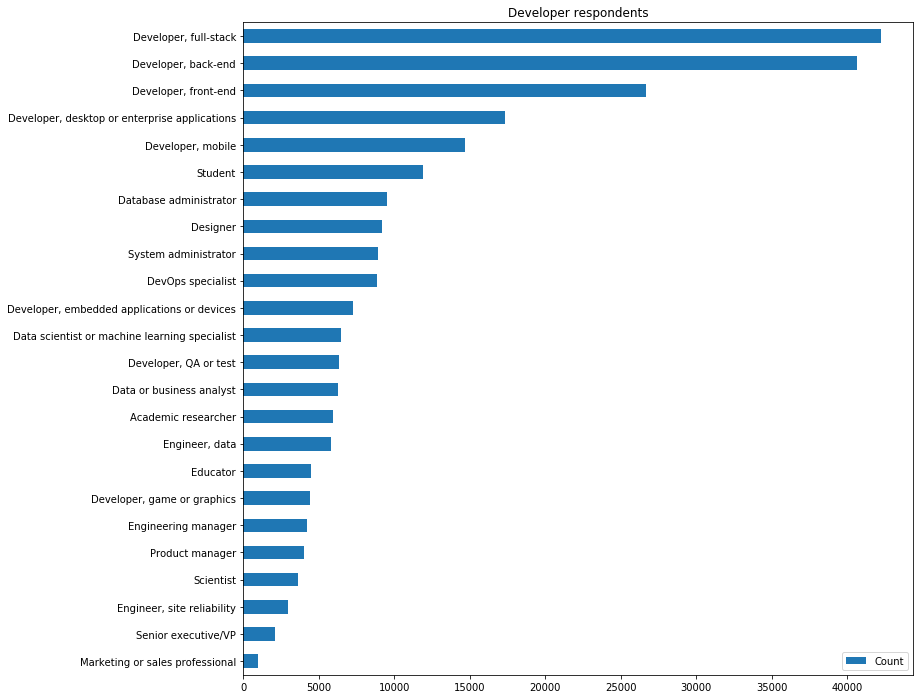

In [168]:
# lets make a bar graph
developer_count = pd.DataFrame.from_dict(unique_developers, orient='index', dtype=None)
developer_count.columns = ['Count']
developer_count.sort_values('Count',ascending=True,inplace=True)

developer_count.plot(kind = 'barh', figsize = (12,12), fontsize = 10, title = 'Developer respondents');

Since we are interested in Data Science language of choice, we will focus on 'Data scientist or machine learning specialist'

In [169]:
# now for each 'Data scientist or machine learning specialist' developer, lets get framework counts
frameworks = frameworks[frameworks['DevType'].notnull()]

# lets create an empty developer dict
developer_dict = {}
for devtype in developer_count.index.tolist():
    developer_dict['{}'.format(devtype)] = {}

# populate the dictionary with frameworks
for dev in developer_dict.keys():
    developer_dict[dev] = {key: 0 for key in list(unique_frameworks.keys())}
    
# now lets count the number of developers using the framework
for key, val in enumerate(frameworks['DevType']):
    all_developers = val.split(';')
    all_frameworks = frameworks.iloc[key, 49].split(';')
    for dev in all_developers:
        for fra in all_frameworks:
            developer_dict[dev][fra] += 1

developer_framework_count = pd.DataFrame.from_dict(developer_dict, orient='index', dtype=None).T


In [170]:
developer_framework_count.head()

,Academic researcher,Data or business analyst,Data scientist or machine learning specialist,Database administrator,Designer,DevOps specialist,"Developer, QA or test","Developer, back-end","Developer, desktop or enterprise applications","Developer, embedded applications or devices",...,Educator,"Engineer, data","Engineer, site reliability",Engineering manager,Marketing or sales professional,Product manager,Scientist,Senior executive/VP,Student,System administrator
Django,765,783,1118,1109,858,1254,647,4455,1247,695,...,581,867,471,496,127,489,471,281,1545,1238
Flask,750,788,1484,947,640,1360,581,4113,1185,717,...,505,1075,518,484,101,423,500,256,1294,1144
Express,668,687,684,1514,1491,1705,943,6237,2109,967,...,740,765,537,787,169,730,338,431,1808,1374
jQuery,1861,2368,1742,4892,4686,3216,2794,16358,6969,2560,...,1818,1871,996,1456,478,1768,930,875,4274,4003
React.js,918,1001,1084,1963,2299,2469,1444,9357,3178,1324,...,1077,1139,786,1222,227,1092,528,659,2314,1828


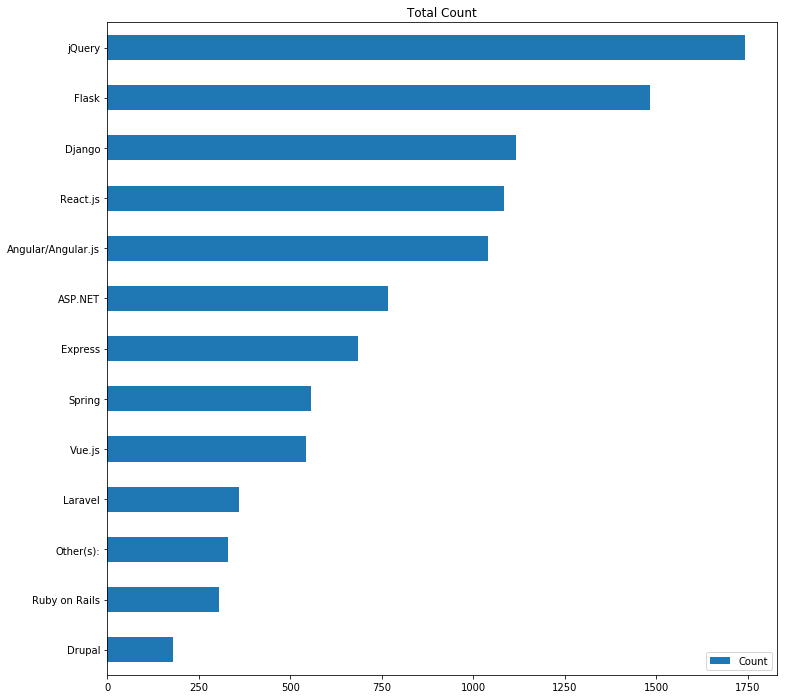

In [175]:
# good, now we have a dataframe of framework by developer

# lets now get a distribution to answer our question
ds_count = pd.DataFrame(developer_framework_count['Data scientist or machine learning specialist'])
ds_count.columns = ['Count']
ds_count.sort_values('Count',ascending=True,inplace=True)

ds_count.plot(kind = 'barh', figsize = (12,12), fontsize = 10, title = 'Total Count');

In [172]:
ds_count['% Count'] = 100*ds_count.Count/sum(ds_count.Count)

In [173]:
ds_count.sort_values(by='% Count',ascending=False).head()

,Count,% Count
jQuery,1742,17.086807
Flask,1484,14.556155
Django,1118,10.966160
React.js,1084,10.632663
Angular/Angular.js,1041,10.210888


---
__Insight__

Very interesting, JQuery, Flask and Django are the top three frameworks of choice for Data scientist or ML specialist. For those desiring to enter the data science or machine learning landscape, learning these frameworks is definitely a good investment. But overall jQuery is the framework of choice for 17% of all developers who identify as Data scientist or ML specialist.

Flask is not far behind too.

---